# FIRST TEST

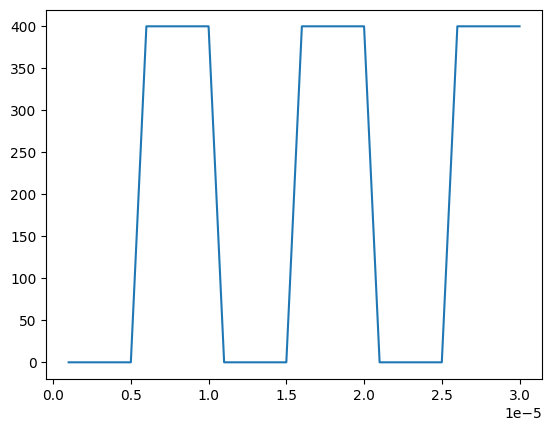

In [5]:
import matplotlib.pyplot as plt
Freq = 100e3
rise_fall_time= 1e-6#100e-9
tarr =[]
varr =[]
time=0
vmin = 0
vmax=400
for i in range(3):
    # One cycle 
    #tarr.append(time)
    #varr.append(0)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +0.5/Freq-rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmax)
    time = time +0.5/Freq-rise_fall_time
    tarr.append(time)
    varr.append(vmax)
    
plt.plot(tarr, varr)

    
    
    


# 0 400V

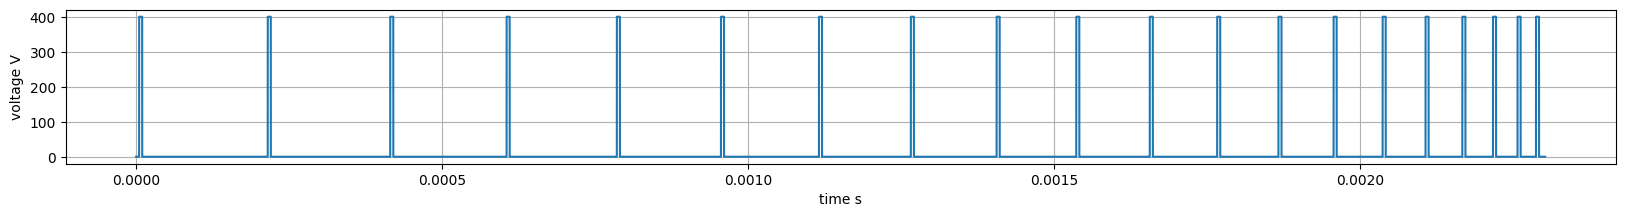

In [49]:
import matplotlib.pyplot as plt
import pandas as pd 
Freq = 100e3
rise_fall_time= 100e-9
tarr =[]
varr =[]
time=0
vmin = 0
vmax=400

start_time_off=200e-6
dt_each_cycle= 1/Freq
for i in range(100):
    # One cycle 
    #tarr.append(time)
    #varr.append(0)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +0.5/Freq-rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmax)
    time = time +0.5/Freq-rise_fall_time
    tarr.append(time)
    varr.append(vmax)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +start_time_off
    tarr.append(time)
    varr.append(vmin)
    start_time_off-=dt_each_cycle
    if start_time_off < 1/Freq:
        break
total_time_0= tarr[-1]
plt.figure( figsize=(20,2))
plt.plot(tarr, varr)
plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.savefig("voltage_plot_soft_start.jpg")
plt.show()



df = pd.DataFrame(tarr)
df[1]= varr
#df.to_csv("voltage_plot_soft_start.txt", sep = "\t", index= False)

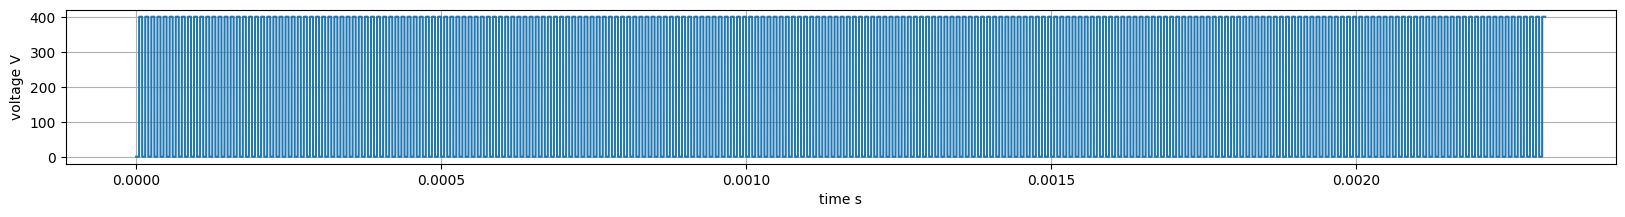

In [50]:
tarr =[]
varr =[]
time=0
for i in range(3000):
    # One cycle 
    #tarr.append(time)
    #varr.append(0)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +0.5/Freq-rise_fall_time
    tarr.append(time)
    varr.append(vmin)
    time = time +rise_fall_time
    tarr.append(time)
    varr.append(vmax)
    time = time +0.5/Freq-rise_fall_time
    tarr.append(time)
    varr.append(vmax)
    if time >=total_time_0:
        break

    
total_time_0= tarr[-1]
plt.figure( figsize=(20,2))
plt.plot(tarr, varr)
plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.savefig("voltage_plot_NO_soft_start.jpg")
plt.show()



df = pd.DataFrame(tarr)
df[1]= varr
#df.to_csv("voltage_plot_NO_soft_start.txt", sep = "\t", index= False)


# High Low and dead time 

### No SOFT START

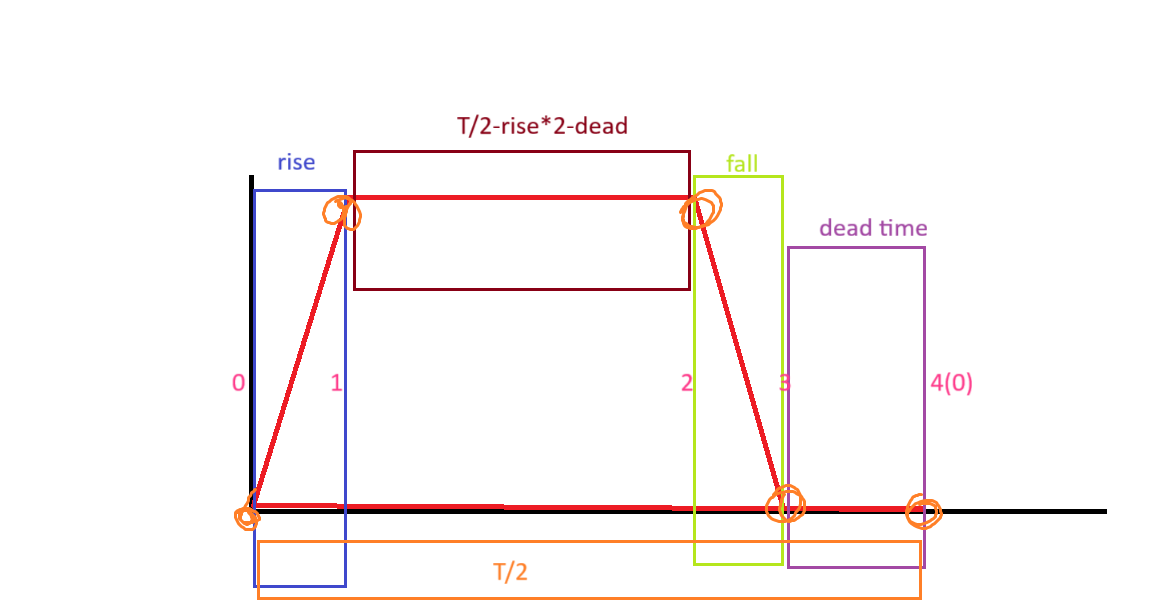

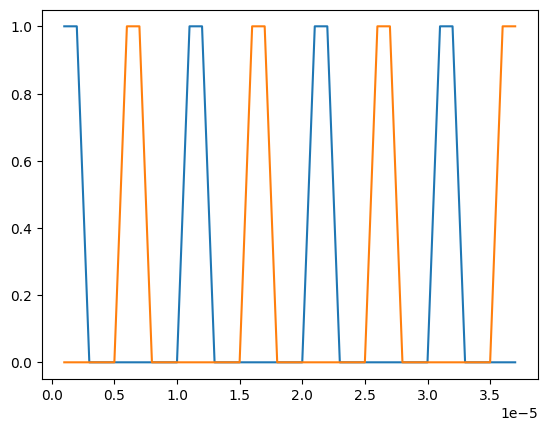

In [239]:
def signalPWMold(Freq = 100e3, simTime = 1e-3, rise_fall_time= 1e-6, dead_time= 2e-6 , deadTime=0) : 
    phase = True 
    T= 1/Freq
    N = int(simTime/T)
    arr = np.zeros((N*10, 3))
    nmode= 4
    phasei=1
    for i in range(len(arr)):
        if phase : 
            phasei = 1
        else: 
            phasei = 2
        if i%nmode==0:
            if i == 0:
                arr[i][0]=0+rise_fall_time
                arr[i][phasei]=1
                continue 
            arr[i][0]=arr[i-1][0]+rise_fall_time
            arr[i][phasei]=1
        if i%nmode==1:
            arr[i][0]=arr[i-1][0]+T/2-dead_time-2*rise_fall_time
            arr[i][phasei]=1
        if i%nmode==2:
            arr[i][0]=arr[i-1][0]+rise_fall_time
            arr[i][phasei]=0
        if i%nmode==3:
            arr[i][0]=arr[i-1][0]+ dead_time
            arr[i][phasei]=0
            phase = not phase
            #print(phase)
    return arr
        
        
A= signalPWMold(simTime = 30e-6)
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
#plt.xlim([0,30e-6])


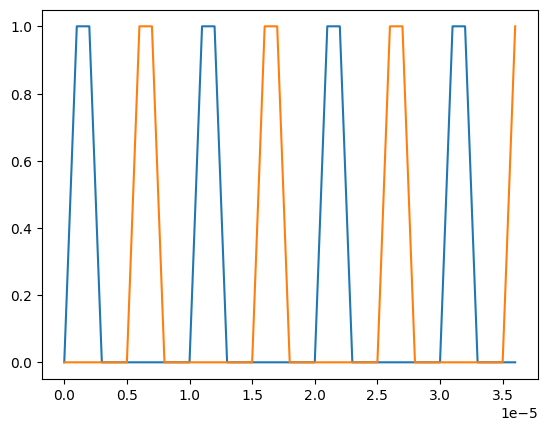

In [242]:
def signalPWM1(Freq = 100e3, simTime = 1e-3, rise_fall_time= 1e-6, dead_time= 2e-6 , deadTime=0) : 
    phase = True 
    T= 1/Freq
    N = int(simTime/T)
    arr = np.zeros((N*10, 3))
    nmode= 4
    phasei=1
    for i in range(len(arr)):
        if phase : 
            phasei = 1
        else: 
            phasei = 2
        match i%nmode:
            case 0:
                if i >0:
                    arr[i][0]=arr[i-1][0]+ dead_time
                    phase = not phase
            case 1:
                arr[i][0]=arr[i-1][0]+rise_fall_time
                arr[i][phasei]=1
            case 2:
                arr[i][0]=arr[i-1][0]+T/2-dead_time-2*rise_fall_time
                arr[i][phasei]=1
            case 3: 
                arr[i][0]=arr[i-1][0] +rise_fall_time
                    

    return arr
        
        
A= signalPWM1(simTime = 30e-6)
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
#plt.xlim([0,30e-6])


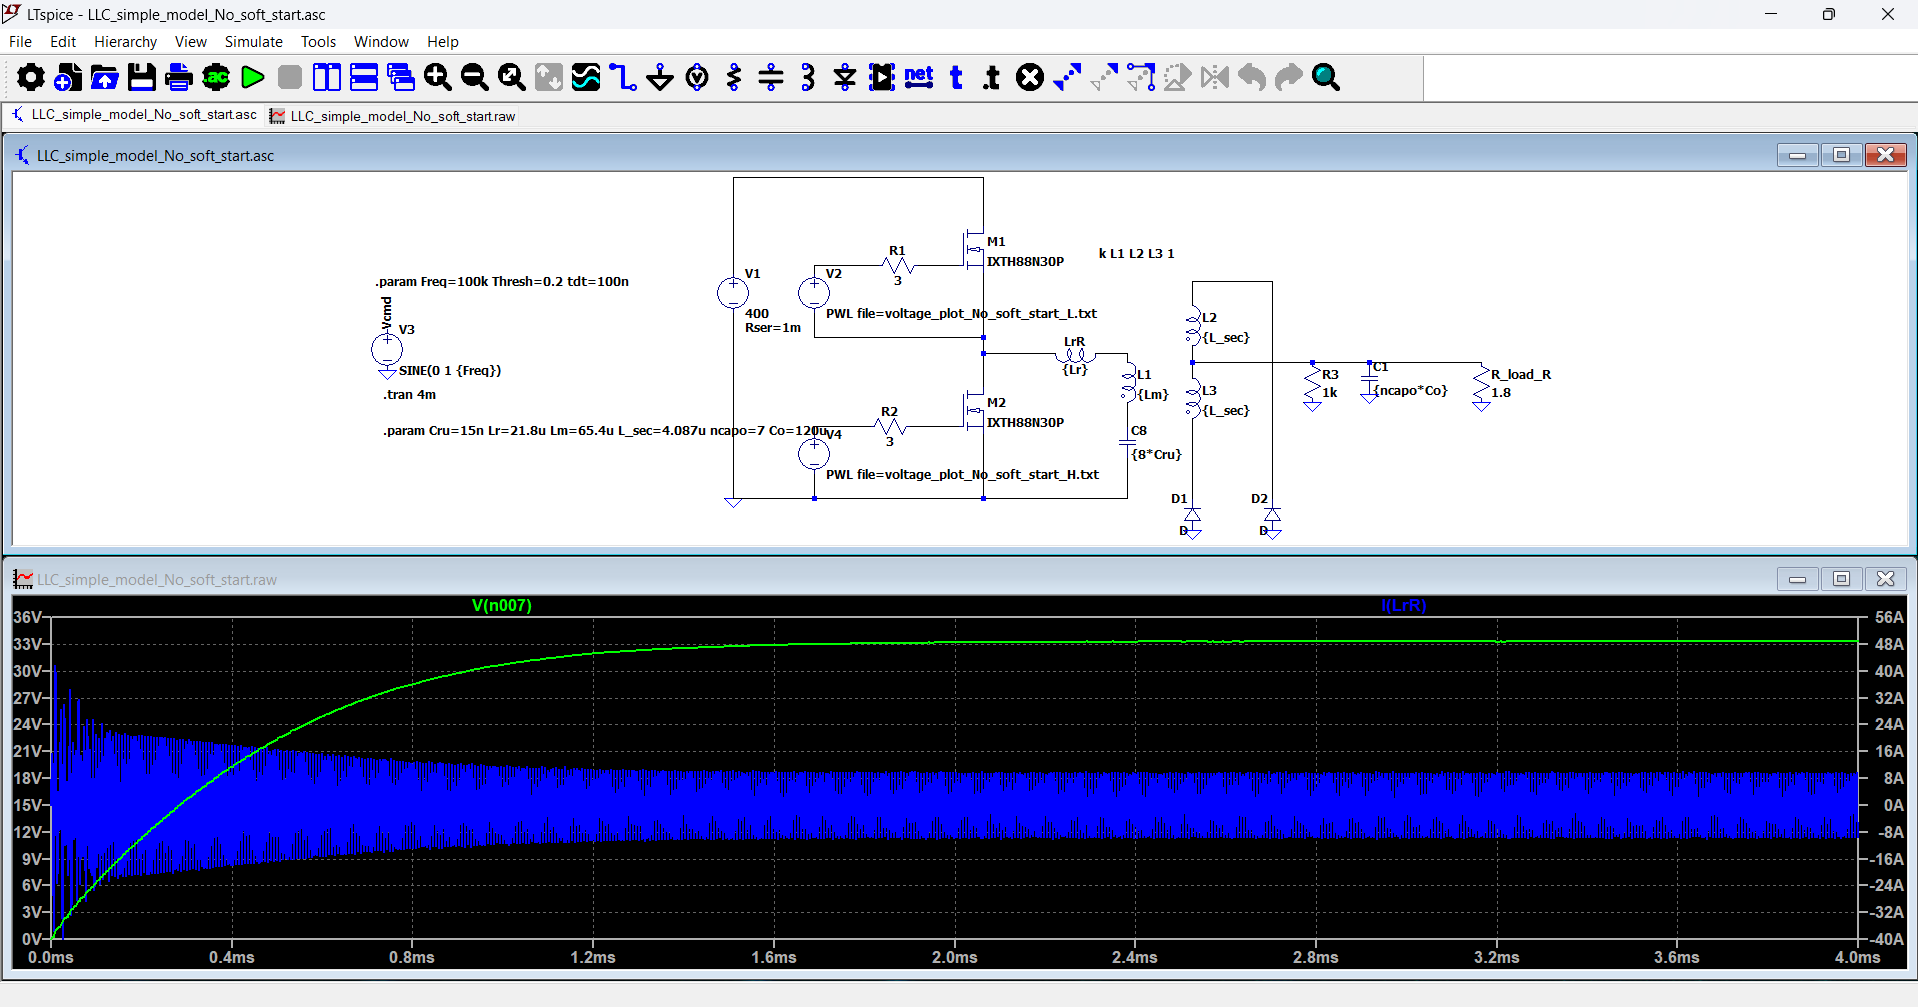

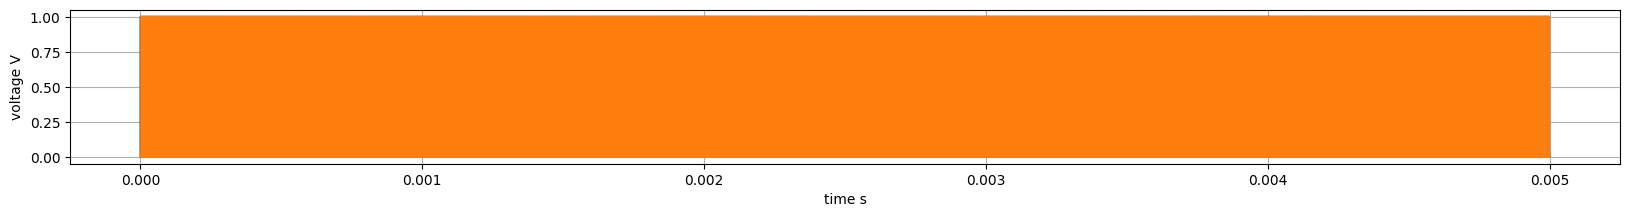

<Figure size 640x480 with 0 Axes>

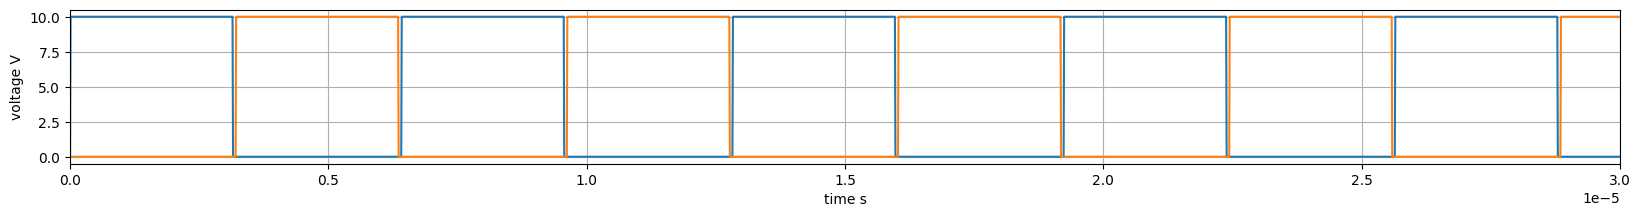

In [266]:
rise_fall_time= 10e-9
dead_time= 50e-9

A= signalPWM1(simTime = 4e-3, rise_fall_time=rise_fall_time,dead_time= dead_time, Freq = 156e3 )
plt.figure( figsize=(20,2))
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])



plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()
plt.savefig("voltage_plot_soft_start.jpg")

plt.show()



df = pd.DataFrame(A)
#df = df*10
df.iloc[:, 1:3] =df.iloc[:, 1:3]*10
df[[0,1]].to_csv("voltage_plot_No_soft_start_H.txt", sep = "\t", index= False, header = None)
df[[0,2]].to_csv("voltage_plot_No_soft_start_L.txt", sep = "\t", index= False, header = None)

Vh=10
plt.figure( figsize=(20,2))
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
plt.xlim([0,30e-6])
plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()

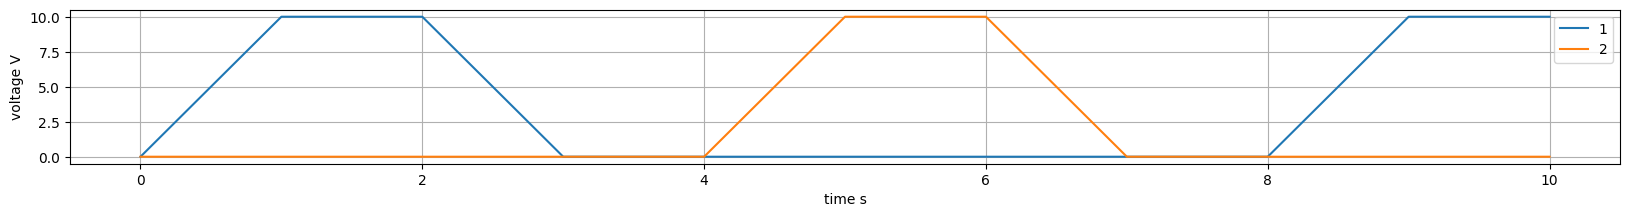

In [267]:
fig, ax= plt.subplots( figsize=(20,2))
df.loc[:10,1:3].plot(ax=ax)

#plt.xlim([0,30e-6])
plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()


### SOFT start strategy 1 

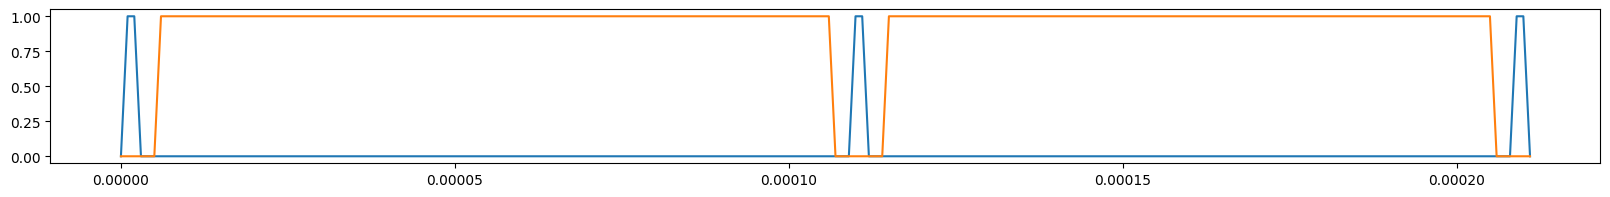

In [275]:
def signalPWM2(Freq = 100e3, simTime = 1e-3, rise_fall_time= 1e-6, dead_time= 2e-6 , deadTime=0) : 
    phase = True 
    T= 1/Freq
    N = int(simTime/T)
    arr = np.zeros((N*10, 3))
    nmode= 4
    phasei=1

    Tquite=10*T
    count = 0 
    
    for i in range(len(arr)):
        if phase : 
            phasei = 1
        else: 
            phasei = 2
        match i%nmode:
            case 0:
                if i >0:
                    arr[i][0]=arr[i-1][0]+ dead_time
                    phase = not phase
            case 1:
                arr[i][0]=arr[i-1][0]+rise_fall_time
                arr[i][phasei]=1
            case 2:
                arr[i][0]=arr[i-1][0]+T/2-dead_time-2*rise_fall_time
                arr[i][phasei]=1
            case 3: 
                arr[i][0]=arr[i-1][0] +rise_fall_time
        if i%(nmode)==2 and phasei == 2:
            #print(i)
            if Tquite > T and i> 0 :
                arr[i][1]=0
                arr[i][2]=1
                arr[i][0]=arr[i-1][0]+Tquite
                Tquite=Tquite-T
                    

    return arr

fig, ax= plt.subplots( figsize=(20,2))

A= signalPWM2(simTime = 24e-6)
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
#plt.xlim([0,130e-6])

In [276]:
df

,0,1,2
0,0.000000e+00,0.0,0.0
1,1.000000e-08,10.0,0.0
2,3.145128e-06,10.0,0.0
3,3.155128e-06,0.0,0.0
4,3.205128e-06,0.0,0.0
...,...,...,...
6235,5.342449e-03,0.0,0.0
6236,5.342499e-03,0.0,0.0
6237,5.342509e-03,0.0,10.0
6238,5.345644e-03,0.0,10.0


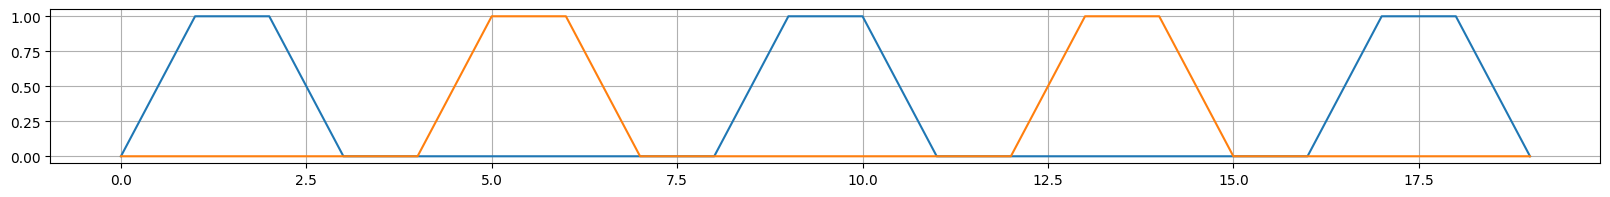

In [277]:
fig, ax= plt.subplots( figsize=(20,2))

A= signalPWM2(simTime = 24e-6)
plt.plot(A.T[1])
plt.plot( A.T[2])
plt.grid()

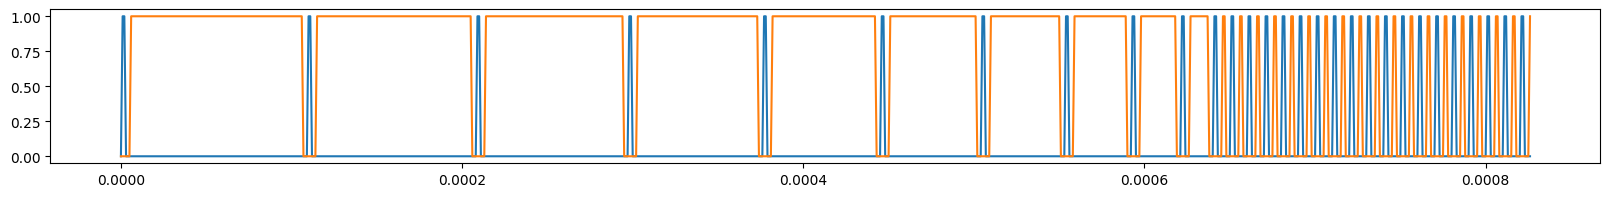

In [278]:
fig, ax= plt.subplots( figsize=(20,2))

A= signalPWM2(simTime = 230e-6)
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
#plt.xlim([0,130e-6])

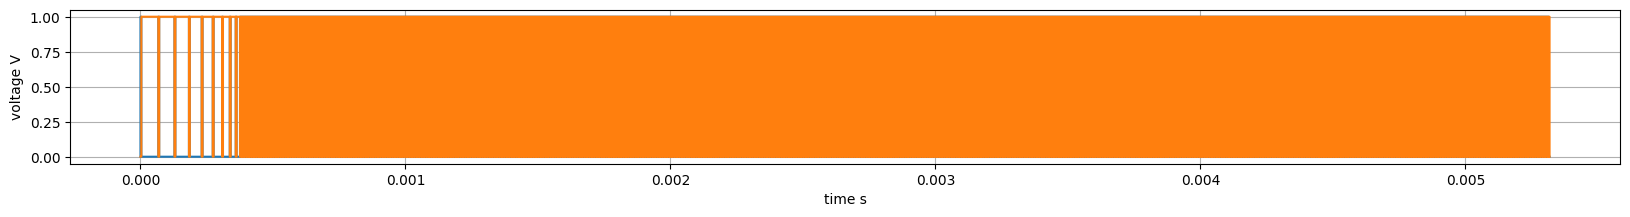

<Figure size 640x480 with 0 Axes>

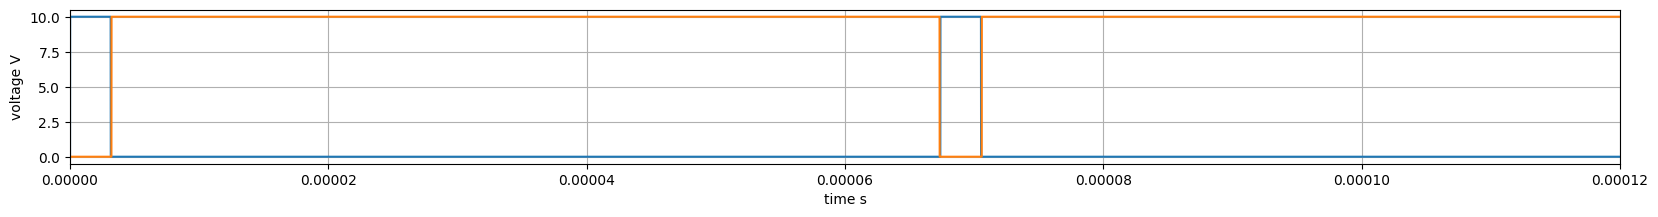

In [279]:
rise_fall_time= 10e-9
dead_time= 50e-9

A= signalPWM2(simTime = 4e-3, rise_fall_time=rise_fall_time,dead_time= dead_time, Freq = 156e3 )
plt.figure( figsize=(20,2))
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])



plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()
plt.savefig("voltage_plot_soft_start.jpg")

plt.show()



df = pd.DataFrame(A)
#df = df*10
df.iloc[:, 1:3] =df.iloc[:, 1:3]*10
df[[0,1]].to_csv("voltage_plot_soft_start_H.txt", sep = "\t", index= False, header = None)
df[[0,2]].to_csv("voltage_plot_soft_start_L.txt", sep = "\t", index= False, header = None)


plt.figure( figsize=(20,2))
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
plt.xlim([0,120e-6])
plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()

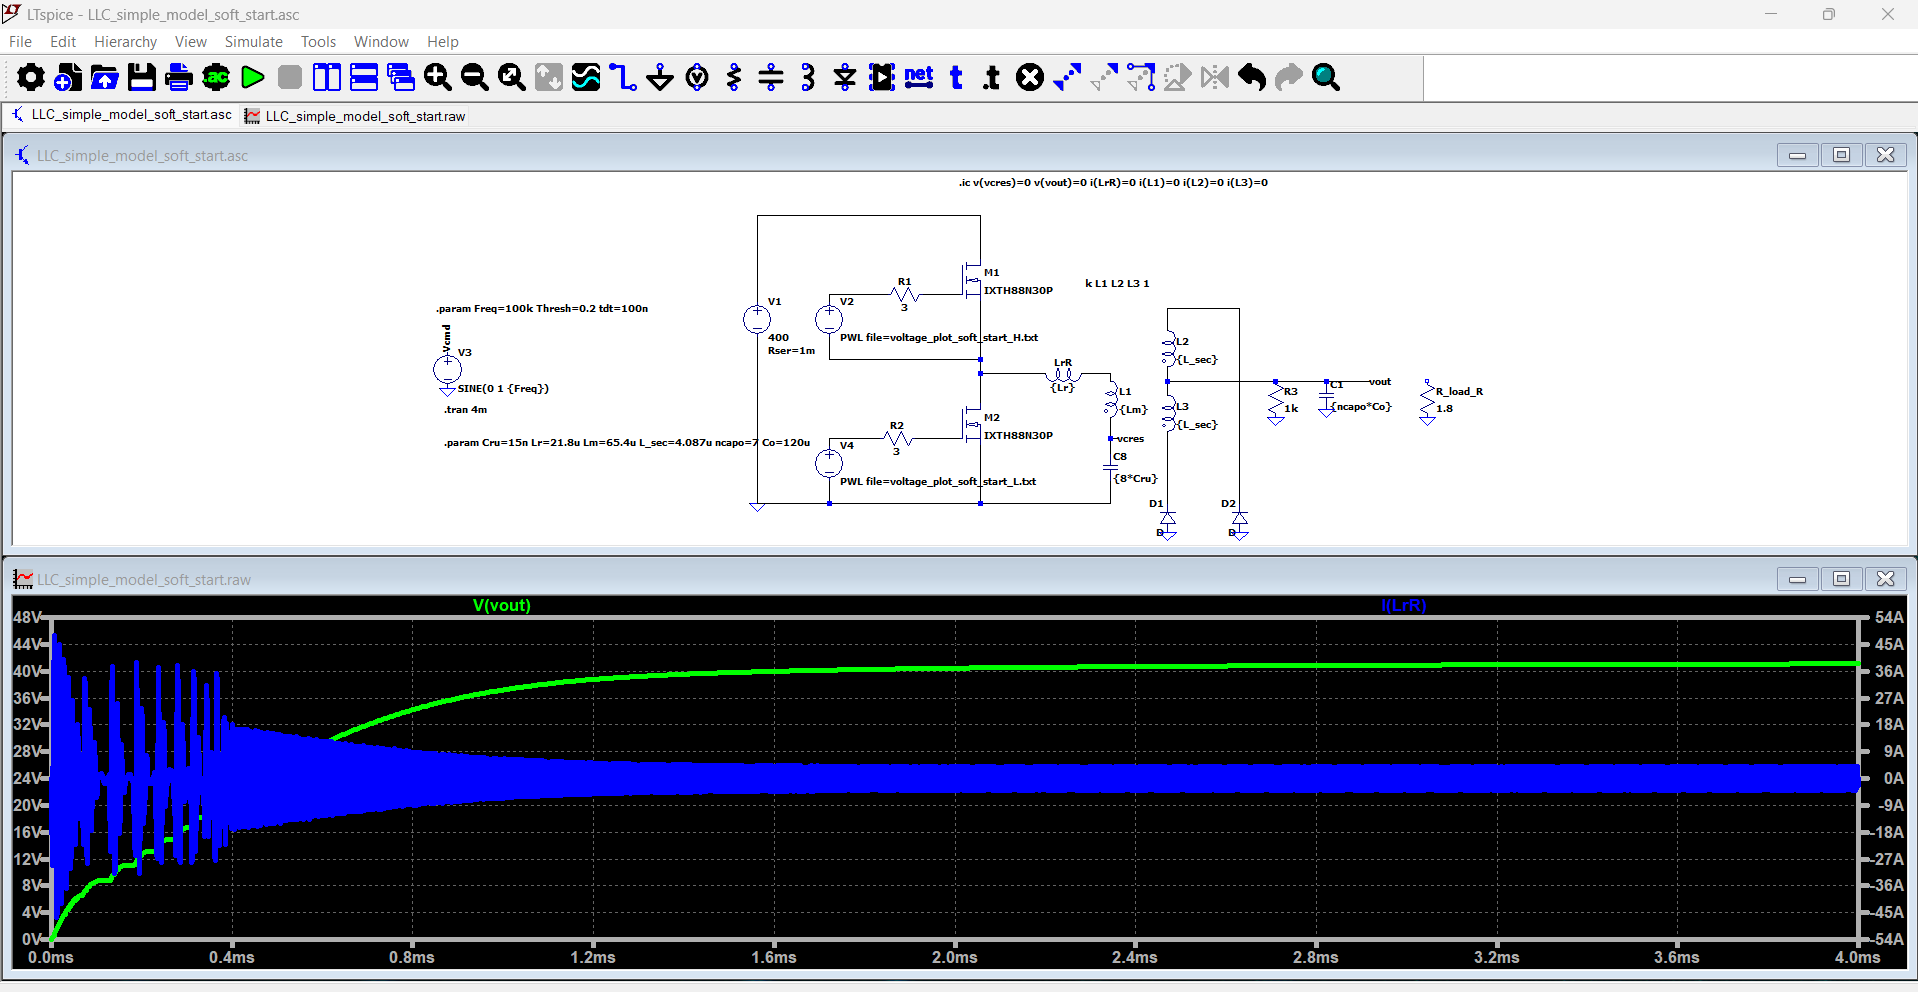

### SOFT START 2

3e-05 100000.0


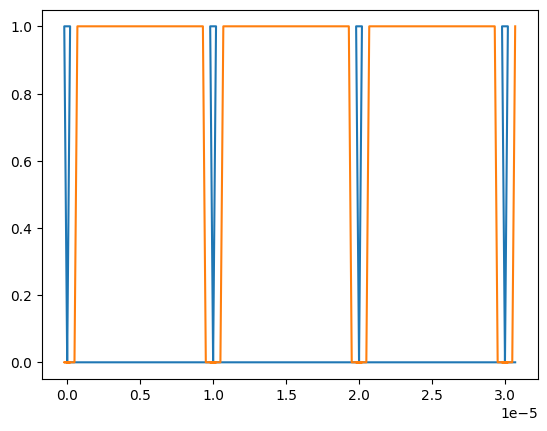

In [312]:
def signalPWM3(Freq = 100e3, simTime = 1e-3, rise_fall_time= 0.2e-6, dead_time= 0.5e-6 , deadTime=0) : 
    phase = True 
    T= 1/Freq
    N = int(simTime/T)
    arr = np.zeros((N*10, 3))
    nmode= 4
    phasei=1

    Trat=0.05
    T1=Trat*T
    T2=(1-Trat)*T
    
    n=1

    print(simTime , Freq)
    for i in range(len(arr)):
        if phase : 
            phasei = 1
        else: 
            phasei = 2
        match i%nmode:
            case 0:
                if i >0:
                    arr[i][0]=arr[i-1][0]+ dead_time
                    phase = not phase
            case 1:
                arr[i][0]=arr[i-1][0]+rise_fall_time
                arr[i][phasei]=1
            case 2:
                if phasei==1:
                    Tuse = T1
                    n+=1
                    if n%10 ==0 and Trat < 0.5:
                        Trat+=0.005
                        T1=Trat*T
                        T2=(1-Trat)*T
                                            
                else :
                    Tuse = T2
                arr[i][0]=arr[i-1][0]+Tuse-dead_time-2*rise_fall_time
                arr[i][phasei]=1
            case 3: 
                arr[i][0]=arr[i-1][0] +rise_fall_time
                    

    return arr
        
        
A= signalPWM3(simTime = 30e-6)
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
#plt.xlim([0,30e-6])


0.0002 100000.0


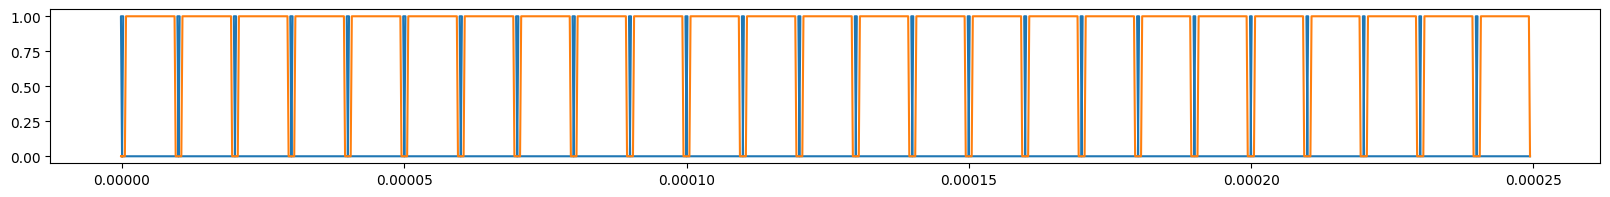

In [313]:
fig, ax= plt.subplots( figsize=(20,2))

A= signalPWM3(simTime = 200e-6)
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
#plt.xlim([0,130e-6])

0.006 156000.0


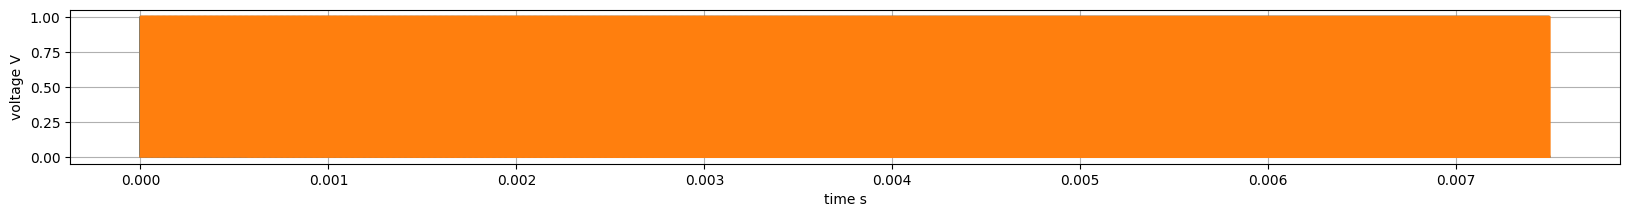

<Figure size 640x480 with 0 Axes>

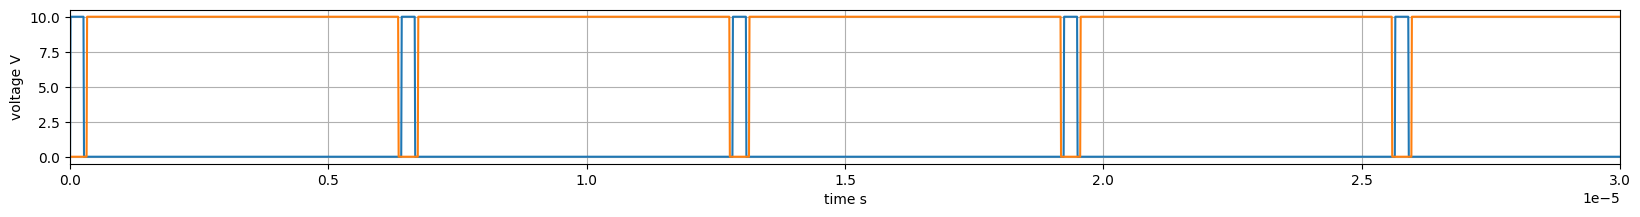

In [315]:
rise_fall_time= 10e-9
dead_time= 50e-9

A= signalPWM3(simTime = 6e-3, rise_fall_time=rise_fall_time,dead_time= dead_time, Freq = 156e3 )
plt.figure( figsize=(20,2))
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])



plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()
plt.savefig("voltage_plot_soft_start.jpg")

plt.show()



df = pd.DataFrame(A)
#df = df*10
df.iloc[:, 1:3] =df.iloc[:, 1:3]*10
df[[0,1]].to_csv("voltage_plot_soft_start_H.txt", sep = "\t", index= False, header = None)
df[[0,2]].to_csv("voltage_plot_soft_start_L.txt", sep = "\t", index= False, header = None)

Vh=10
plt.figure( figsize=(20,2))
plt.plot(A.T[0], A.T[1])
plt.plot(A.T[0], A.T[2])
plt.xlim([0,30e-6])
plt.xlabel("time s")
plt.ylabel("voltage V")
plt.grid()
plt.show()

In [ ]:
########## start with 0.1 decrease with 0.01

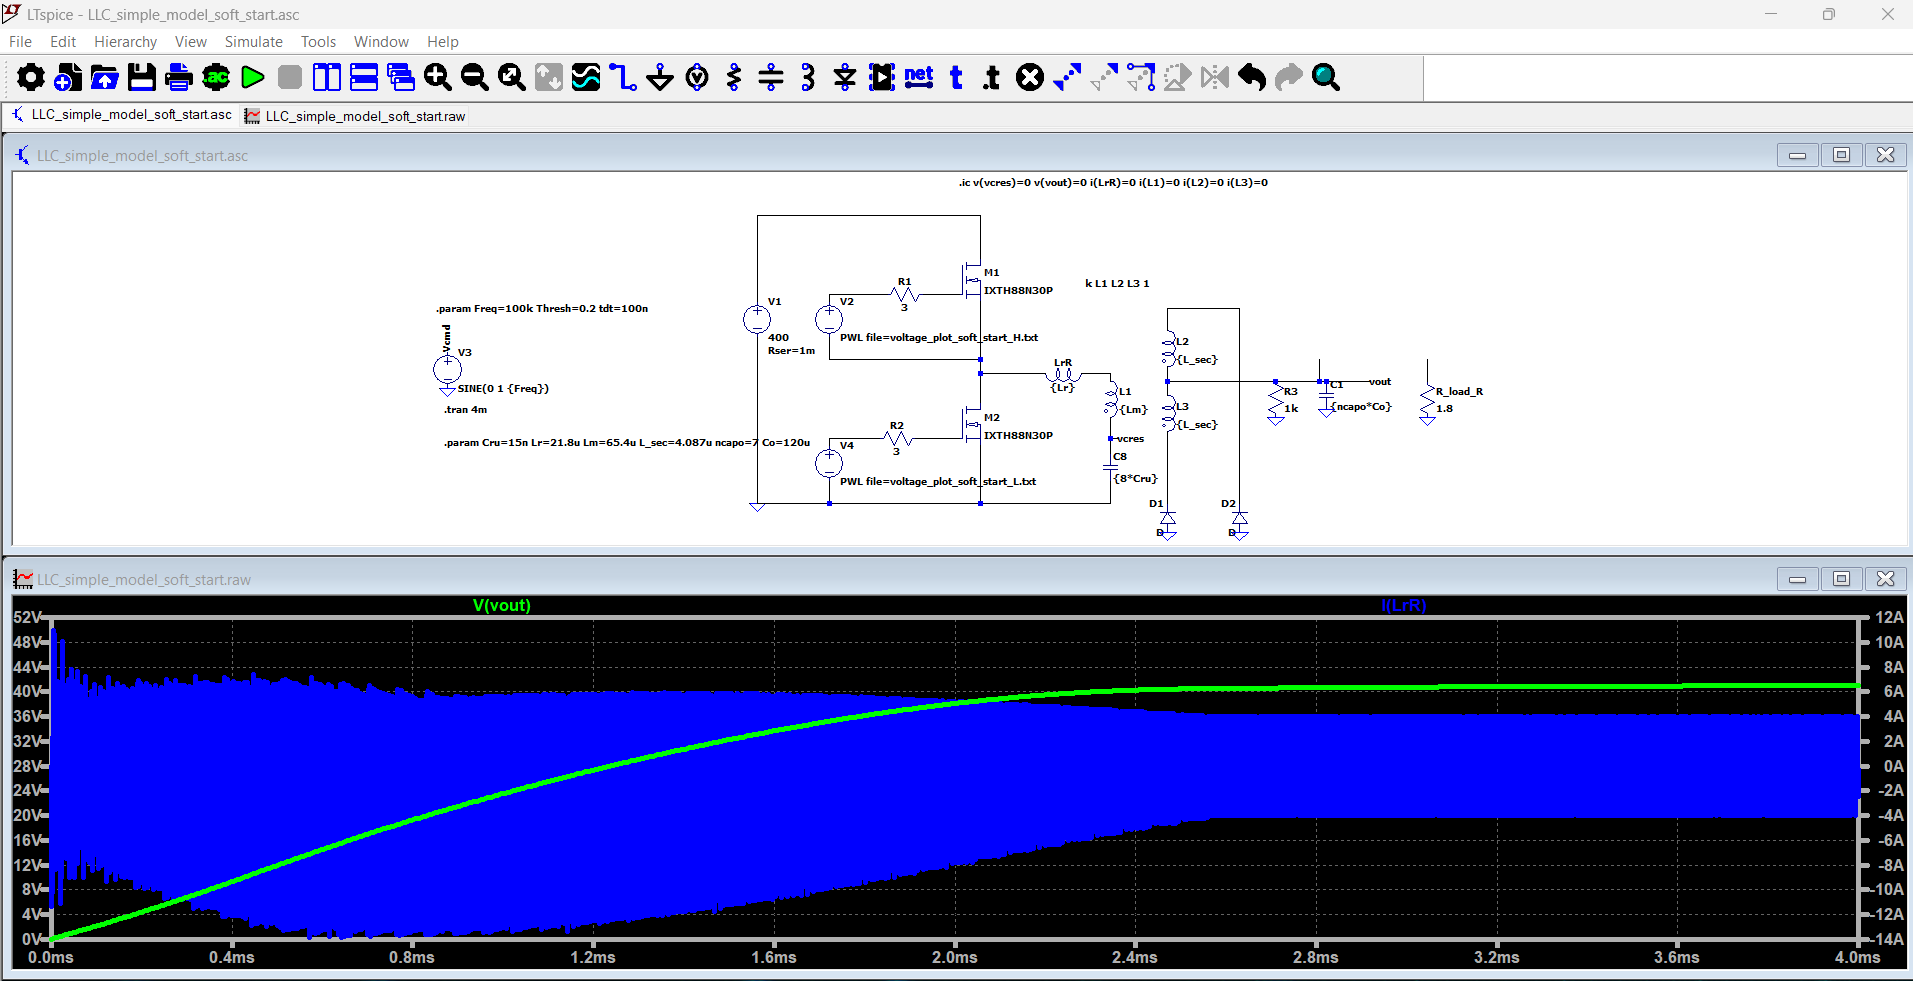

In [316]:
########## start with 0.05 decrease with 0.005

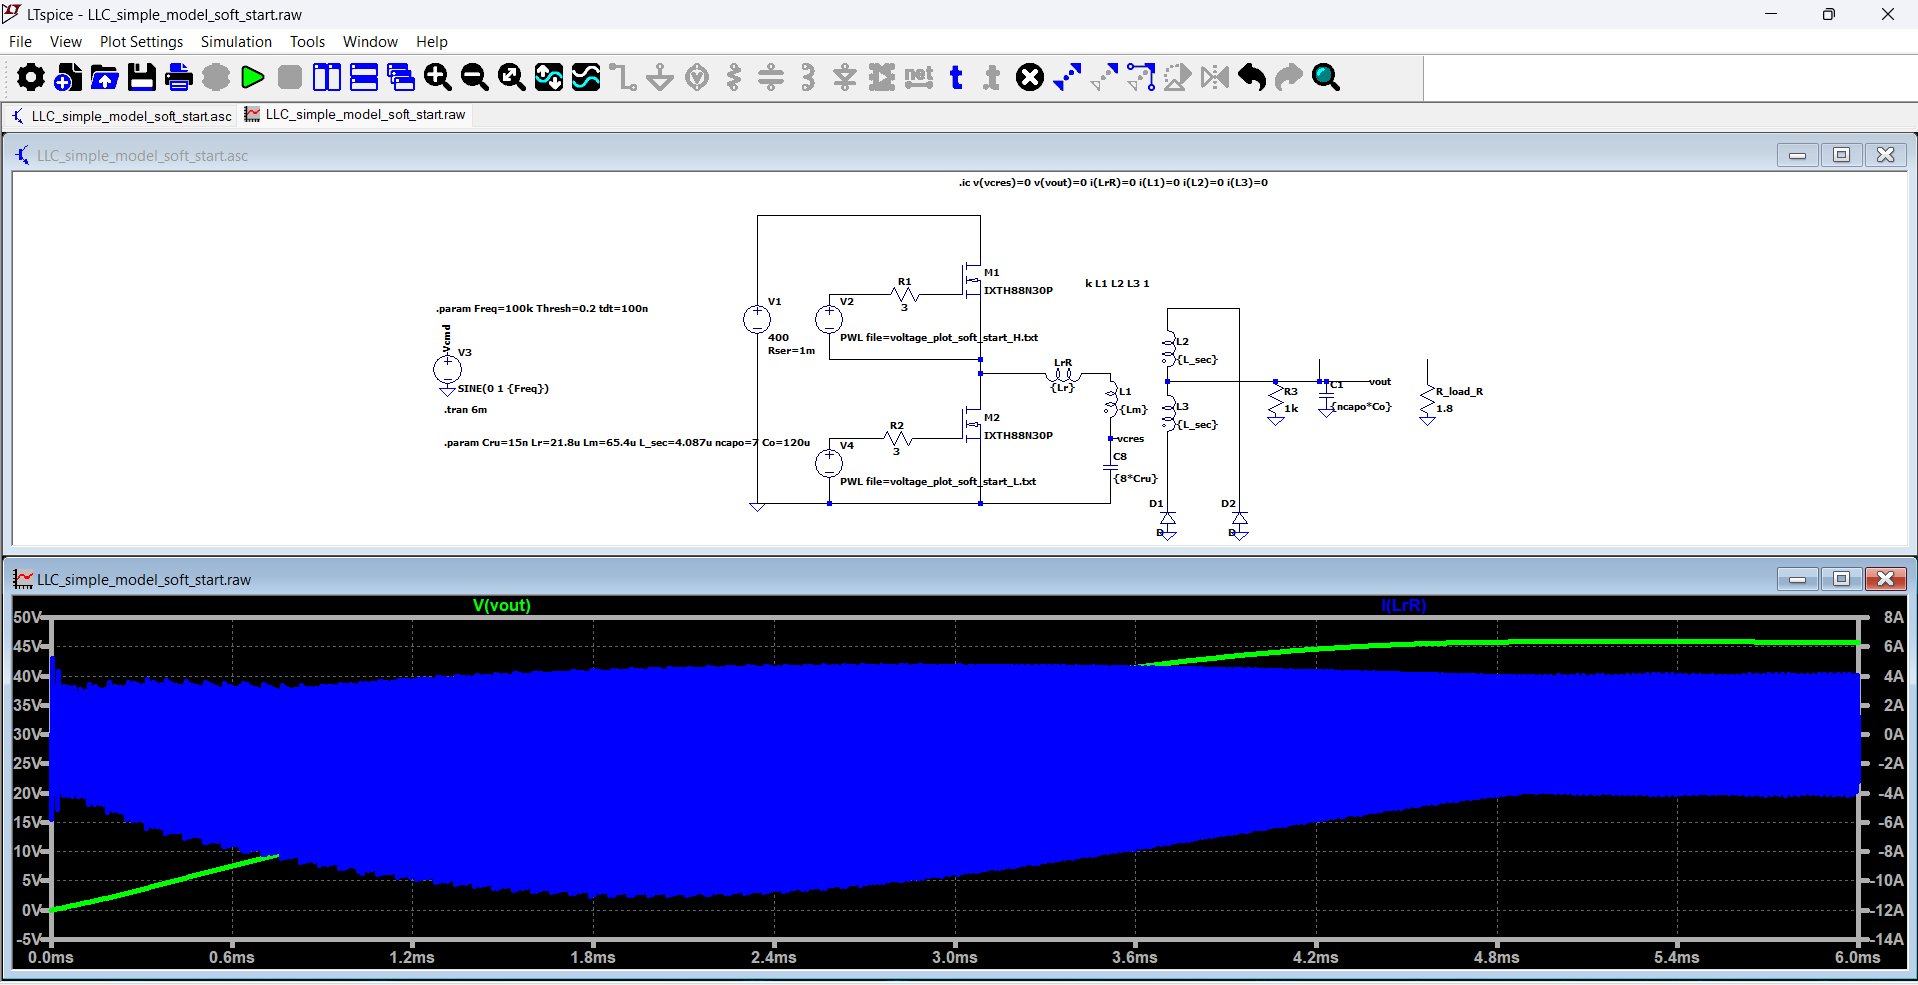

##### with load 

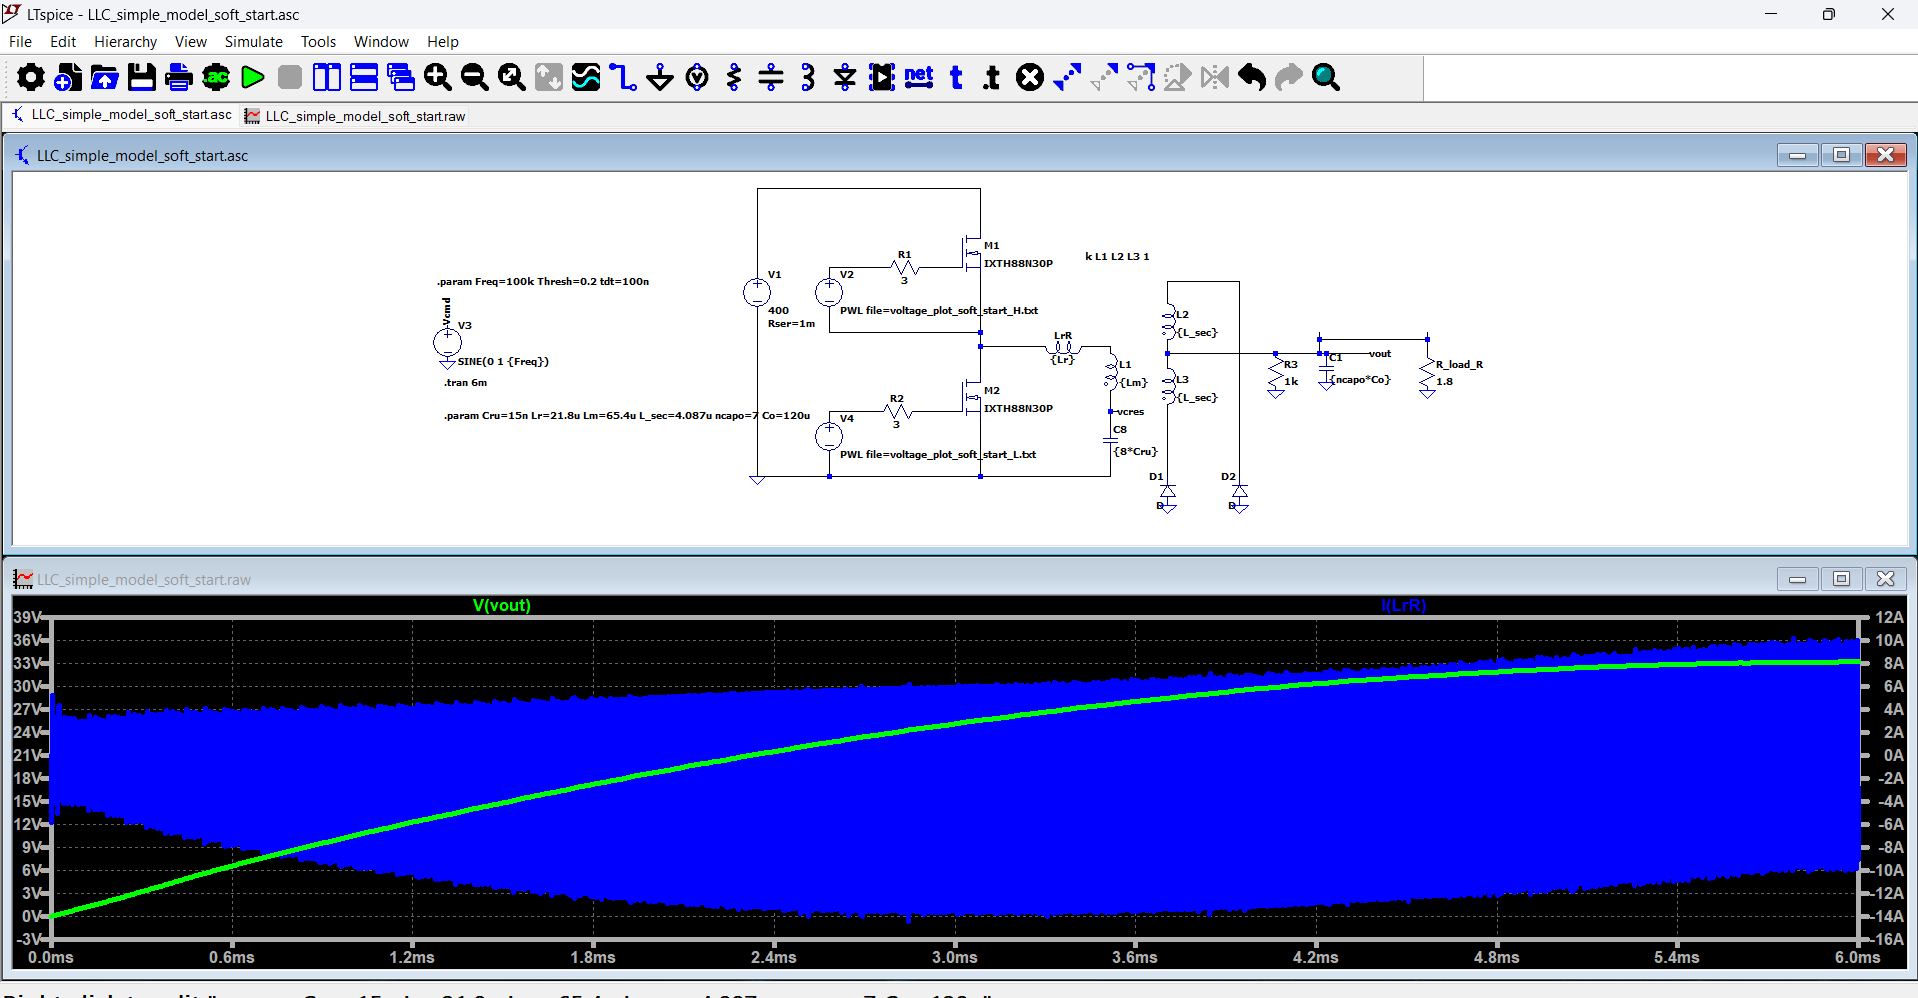

# DRAFT

In [ ]:
def PWM1(Freq = 100e3, simTime = 1e-3, rise_fall_time= 0.2e-6, dutyCycle=0.2, dead_time) : 
    T= 1/Freq
    t = 0
    tarr=[t]
    k=0
    while (t+T<=simTime):
        match k%3: 
            case 1:
                t = t+dutyCycle*T-dead_time/2
                t = rise_fall_time
                
                case 
        k+=1 
        

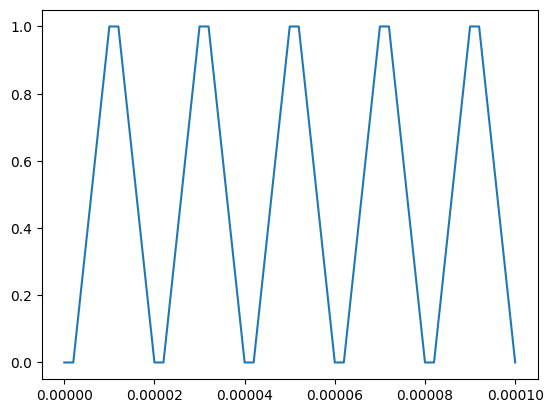

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

def PWM1(Freq = 100e3, simTime = 1e-3, rise_fall_time= 0.2e-6, dutyCycle=0.2) : 
    T= 1/Freq
    time1= np.arange(0, simTime+T, T)
    
    #return time1, T, dutyCycle, simTime
    
    #time1, T, dutyCycle, simTime= PWM()
    time2 = time1+T* dutyCycle
    time12 = np.concat((time1, time2))
    time12.sort()
    time12= time12[time12<=simTime]
    N = len(time12)
    #voltage = np.arange(0,N, 1)%2
    voltage = (np.arange(0,N, 1)/2).astype(int)%2
    return time12, voltage
time12, voltage = PWM1(Freq = 100e3, simTime = 1e-4, rise_fall_time= 0.2e-6, dutyCycle=0.2) 
plt.plot(time12, voltage)

In [18]:
N = len(time12)
np.arange(0,N, 0.5).astype(int)%2

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [17]:
N, len(np.arange(0,2*N, 0.5))

(21, 84)

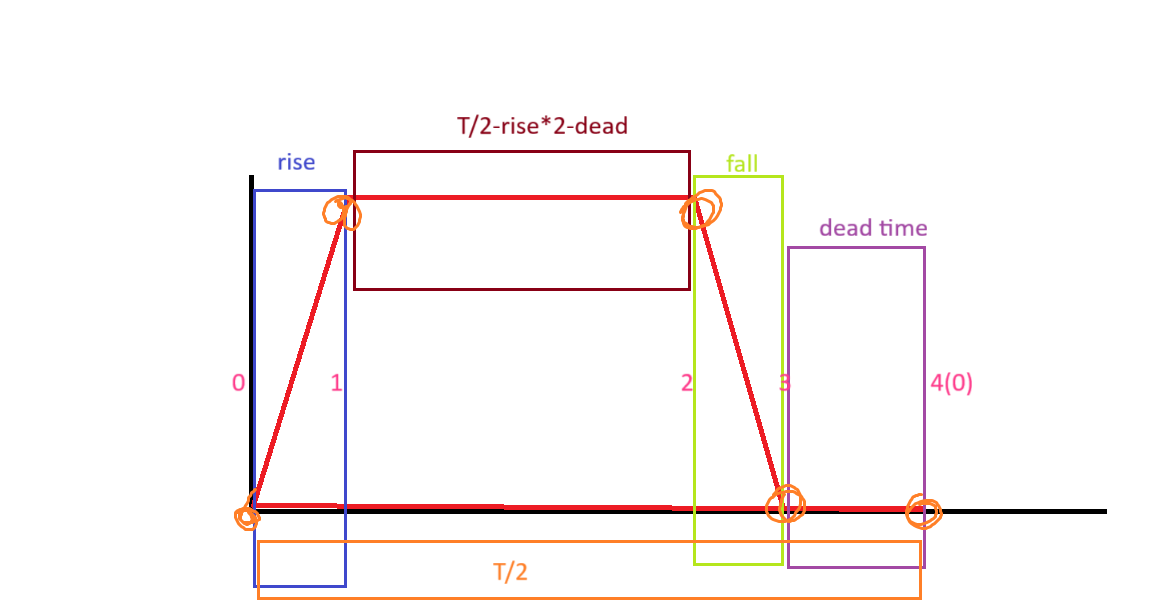

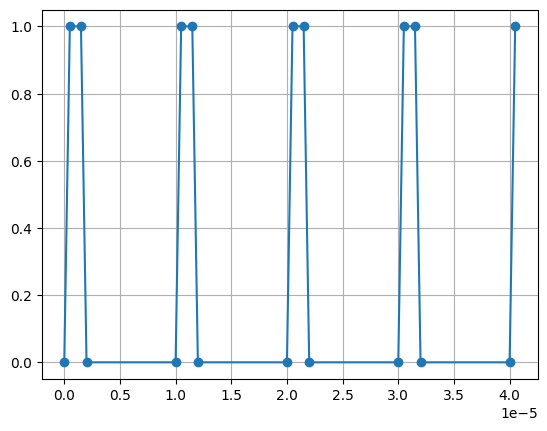

In [73]:
def PWM1(Freq = 100e3, simTime = 1e-4, rise_fall_time= 0.5e-6, dutyCycle=0.3, dead_time=1e-6, delay = 0) : 
    T= 1/Freq
    t = delay
    tarr=[t]
    varr=[0]
    k=1
    while (t+T<=simTime):
        if type(dutyCycle)==np.ndarray: 
            dutyCycleVal = dutyCycle[int(t/T)]
            
        else : 
            dutyCycleVal = dutyCycle
        
        match k%4:
            case 1:
                t += rise_fall_time
                v= 1
            case 2: 
                t += dutyCycleVal*T-2*rise_fall_time-dead_time
                v= 1
            case 3:
                t += rise_fall_time
                v= 0
            case 0:
                t += dead_time+(1-dutyCycleVal)*T
                v= 0
        k+=1
        tarr.append(t)
        varr.append(v)
    return tarr, varr

    
tarr1, varr1 = PWM1(simTime = 0.5e-4)
plt.plot(tarr1, varr1, marker = "o")
plt.grid()

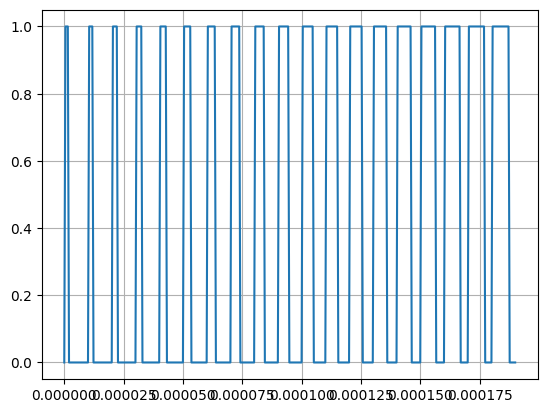

In [116]:
simTime = 2e-4
Freq = 100e3
T=1/Freq 
N_T = int(simTime/T)
dutyCycle= np.linspace(0.3,0.9,N_T)

tarr1, varr1 = PWM1(Freq = Freq , simTime = simTime, dutyCycle=dutyCycle)
plt.plot(tarr1, varr1)
plt.grid()

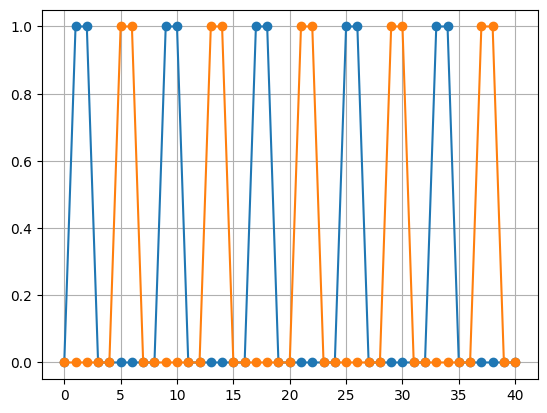

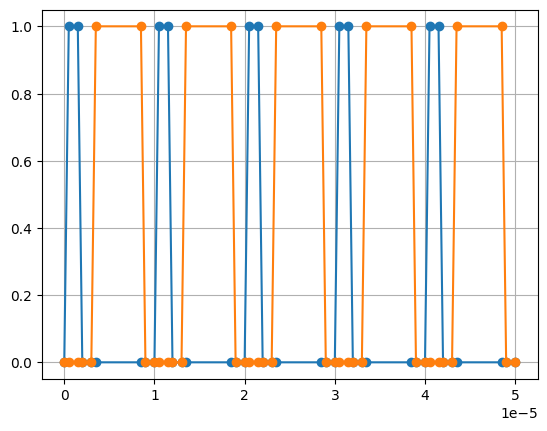

In [118]:
dutyCycle=0.3
simTime = 0.5e-4
Freq = 100e3
T= 1/Freq

simTime2 = simTime +2*T

_dutyCycle=1-dutyCycle
tarr1, varr1 = PWM1(Freq= Freq, simTime = simTime2, dutyCycle=dutyCycle)
tarr2, varr2 = PWM1(Freq= Freq, simTime = simTime2, delay =dutyCycle*T, dutyCycle=_dutyCycle )



tarr= np.concat((tarr1, tarr2))
tarr.sort()

varr12 = np.zeros(len(tarr))
varr22 = np.zeros(len(tarr))

mask1 = np.isin(tarr, tarr1)
mask2 = np.isin(tarr, tarr2)

varr12[mask1]=varr1
varr22[mask2]=varr2
varr1  = varr12
varr2  = varr22

mask = tarr <= simTime 
tarr= tarr[mask]
varr1= varr1[mask]
varr2= varr2[mask]

plt.plot(  varr1, marker = "o")
plt.plot(  varr2, marker = "o")
plt.grid()
plt.show()

plt.plot( tarr, varr1, marker = "o")
plt.plot( tarr, varr2, marker = "o")
plt.grid()

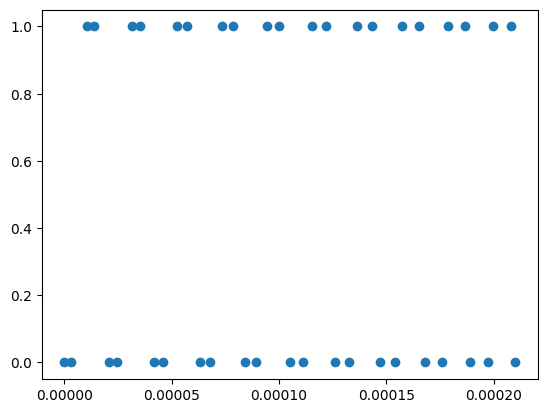

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

simTime = 2.1e-4
Freq = 100e3
T=1/Freq 
N_T = int(simTime/T)
dutyCycle= np.linspace(0.3,0.9,N_T)




def PWM1(T, simTime, dutyCycle):
    time1 = np.linspace(0,simTime, int(simTime /T))
    time2= time1+T*dutyCycle
    time = np.concat((time1, time2))
    time.sort()
    val = (np.arange(0,len(time), 1) /2).astype(int)%2
    mask = time <= simTime
    time, val = time[mask], val [mask]
    return time, val 
time, val  = PWM1(T, simTime, dutyCycle)
plt.scatter(time, val)